## Read Me.
**This Project is about** List of helicopter prison escapes coined from `Wikipedia` gotten from this **URL** `https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts`.
Our gaol in this project is to Test our Data Exploratory Skills to peform the following Task:
```
- To Load, Open and View the file in Pandas Dataframe
- To explore, Clean, Transform and Summarize the data
- To use Visuals To communicate Results(Using the Matplotlib.pyplot Libraries)
```



### Loading the Data to Pandas data frame and Understanding the Structure of the data.

In [1]:
#Loading the rerquird libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url="https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts"

In [3]:
open_file=pd.read_html(url)

#On inspecting the Url further, we notic,there are more than one tables. so we need to request the table we want
data=open_file[0]
data.head()

,0,1
0,NaN,This list is incomplete; you can help by addin...


In [4]:
#requesting for the second table with index 1

data1=open_file[1]
data1.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973, an IRA member hijacked a ..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed-off shotgun against...


In [5]:
# exploring the Data to understand it's structure
#checking the summary of the table

data1.describe()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
count,48,48,48,48,48,48
unique,48,45,15,2,40,48
top,"August 19, 1971",Luynes prison,France,Yes,—,Joel David Kaplan was a New York businessman w...
freq,1,2,15,34,7,1


In [6]:
#checking the types for each columns in the Dataset
data1.dtypes

Date           object
Prison name    object
Country        object
Succeeded      object
Escapee(s)     object
Details        object
dtype: object

In [7]:
# printing the names of all the columns 

data1.columns

Index(['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'], dtype='object')

In [8]:
#number of rows and columns in he dataframe

data1.shape

(48, 6)

In [9]:
#viewing the last 5 items on the data

data1.tail()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
43,"March 17, 2013","Saint-Jérôme Detention Facility, Quebec",Canada,Yes,Benjamin Hudon-BarbeauDanny Provençal,Two inmates escaped from the Saint-Jérôme Dete...
44,"June 7, 2014","Orsainville Detention Facility, Quebec",Canada,Yes,Yves DenisDenis LefebvreSerge Pomerleau,Three detainees awaiting trial for murder esca...
45,"February 22, 2016",Thiva,Greece,No,Pola RoupaNikos Maziotis,A helicopter pilot foiled an attempted hijacki...
46,"July 1, 2018","Réau, near Paris",France,Yes,Rédoine Faïd,Faïd was helped by several heavily armed men w...
47,"September 25, 2020","Forest prison, Brussels",Belgium,No,Kristel A.,Three armed men hijacked a Eurocopter AS355 he...


In [10]:
#hecking if there are any duplicates and counting them

data1.duplicated().sum()

0

In [11]:
#checking if there are any missing values and counting them on each column of the dataframe

data1.isna().all(axis=1).sum()

0

### Transforming the dataSet to make it ready for analysis

In [12]:
# on view the rows and columns, we see that we dont need the "Details" column in the dataset
# deleting the "Details " column

data1.drop("Details", axis=1,inplace=True)
data1.head()

,Date,Prison name,Country,Succeeded,Escapee(s)
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


In [13]:
#we need to extract the years in the date column, but we need to convert the dataype to 'datetime' type

data1['Date']=pd.to_datetime(data1['Date'])
data1['Date'].dtypes

dtype('<M8[ns]')

In [14]:
#extracting the year into a new column in the dataframe

data1['Year']=data1["Date"].dt.year
data1.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Year
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,1971
1,1973-10-31,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,1973
2,1978-05-24,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,1978
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,1981
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,1981


In [15]:
#Rearranging the columns and dropping the 'Date' columns

data1=data1[['Year','Prison name', 'Country', 'Succeeded', 'Escapee(s)']]
data1.head()

,Year,Prison name,Country,Succeeded,Escapee(s)
0,1971,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,1973,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
2,1978,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,1981,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,1981,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


##### Creating Visualizations and analyzing the Data

In [16]:
#grouping the number of escapes by year
Attempts_by_year= data1.groupby("Year").size().reset_index(name='Attempts')
Attempts_by_year

,Year,Attempts
0,1971,1
1,1973,1
2,1978,1
3,1981,2
4,1983,1
5,1985,2
6,1986,3
7,1987,1
8,1988,1
9,1989,2


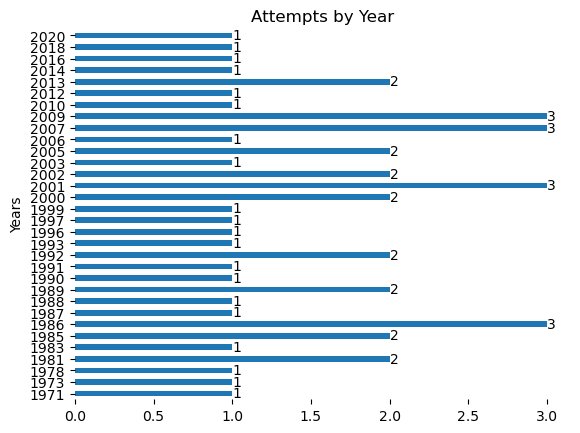

In [17]:
#Creating Visuals Based on the above info using matplotlib.pyplot library

#creating an horizontal bar chart
chart=Attempts_by_year.plot(kind='barh', y='Attempts',x='Year',legend=False)

#Add Labels and titles
plt.ylabel('Years')
plt.title("Attempts by Year")

# Display the values on top of the bars
for index, value in enumerate(Attempts_by_year['Attempts']):
    plt.text(value, index, str(value), va='center')
    
# Remove the chart borders (axes lines and plot border)
chart.spines['top'].set_visible(False)
chart.spines['bottom'].set_visible(False)
chart.spines['right'].set_visible(False)
chart.spines['left'].set_visible(False)

In [18]:
#Grouping the Data by country

attempt_by_country=data1.groupby(['Country']).size().reset_index(name='Attempts')
attempt_by_country

,Country,Attempts
0,Australia,2
1,Belgium,4
2,Brazil,2
3,Canada,4
4,Chile,1
5,France,15
6,Greece,4
7,Ireland,1
8,Italy,1
9,Mexico,1


In [19]:
#sorting the above Table in descending order

attempt_by_country_sorted=attempt_by_country.sort_values(by="Attempts", ascending=False)
attempt_by_country_sorted

,Country,Attempts
5,France,15
14,United States,8
1,Belgium,4
3,Canada,4
6,Greece,4
0,Australia,2
2,Brazil,2
13,United Kingdom,2
4,Chile,1
7,Ireland,1


In [20]:
#resetting the index of the table 

attempt_by_country_sorted=attempt_by_country_sorted.reset_index(drop=True)
attempt_by_country_sorted

,Country,Attempts
0,France,15
1,United States,8
2,Belgium,4
3,Canada,4
4,Greece,4
5,Australia,2
6,Brazil,2
7,United Kingdom,2
8,Chile,1
9,Ireland,1


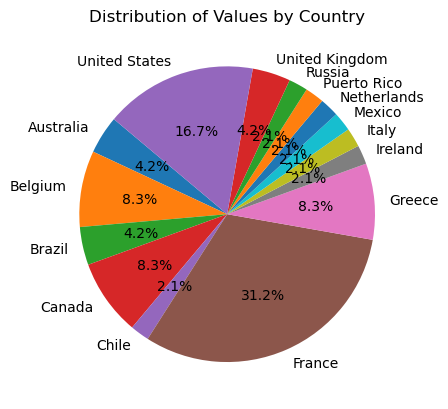

In [21]:
labels = attempt_by_country['Country']
sizes = attempt_by_country['Attempts']


# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Values by Country')

# Display the chart
plt.show()

In [22]:
# Group the DataFrame by 'Country' and calculate the count of successes and failures

attempt_by_country_success=data1.groupby(by='Country')['Succeeded'].value_counts().unstack(fill_value=0).reset_index()
attempt_by_country_success

Succeeded,Country,No,Yes
0,Australia,1,1
1,Belgium,2,2
2,Brazil,0,2
3,Canada,1,3
4,Chile,0,1
5,France,4,11
6,Greece,2,2
7,Ireland,0,1
8,Italy,0,1
9,Mexico,0,1


In [23]:
#renaming the index and the table columns
attempt_by_country_success=attempt_by_country_success.rename(columns=({'No':'Not_successfull', 'Yes':'Successful'}))
attempt_by_country_success=attempt_by_country_success.rename_axis(columns={'Succeeded':'Number'})
attempt_by_country_success

Number,Country,Not_successfull,Successful
0,Australia,1,1
1,Belgium,2,2
2,Brazil,0,2
3,Canada,1,3
4,Chile,0,1
5,France,4,11
6,Greece,2,2
7,Ireland,0,1
8,Italy,0,1
9,Mexico,0,1


In [24]:
#Adding a "total Attempts" column to count the total

attempt_by_country_success["Total Attempts"]=attempt_by_country_success['Not_successfull'] + attempt_by_country_success["Successful"]
attempt_by_country_success

Number,Country,Not_successfull,Successful,Total Attempts
0,Australia,1,1,2
1,Belgium,2,2,4
2,Brazil,0,2,2
3,Canada,1,3,4
4,Chile,0,1,1
5,France,4,11,15
6,Greece,2,2,4
7,Ireland,0,1,1
8,Italy,0,1,1
9,Mexico,0,1,1


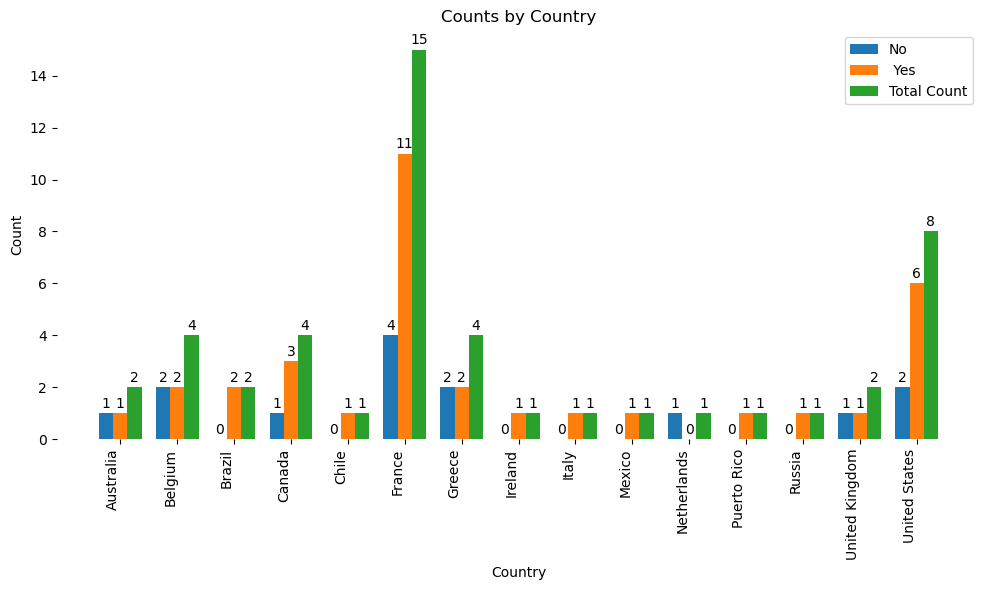

In [25]:
# Set the width of the bars
bar_width = 0.25

# Define the x-axis positions for the bars
x = range(len(attempt_by_country_success['Country']))

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x, attempt_by_country_success['Not_successfull'], bar_width, label='No')
bar2 = ax.bar([i + bar_width for i in x], attempt_by_country_success['Successful'], bar_width, label=' Yes')
bar3 = ax.bar([i + 2*bar_width for i in x], attempt_by_country_success['Total Attempts'], bar_width, label='Total Count')

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Counts by Country')
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(attempt_by_country_success['Country'], rotation=90, ha='right')
ax.legend()

#Removing the Spines From the Chart
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the count values inside the bars
for i, (no, yes, total) in enumerate(zip(attempt_by_country_success['Not_successfull'], attempt_by_country_success['Successful'], attempt_by_country_success['Total Attempts'])):
    ax.text(i, no + 0.1, str(no), ha='center', va='bottom')
    ax.text(i + bar_width, yes + 0.1, str(yes), ha='center', va='bottom')
    ax.text(i + 2*bar_width, total + 0.1, str(total), ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


##### Analysis and Conclusion
***The escape pattern Shows no correlation with time (from the horizontal bar chart) , so no meaniful relationship can be established between the escape attempts and time***.    
**Meanwhile, the number of succesful attepmts as shown by thr grouped bar chart signifies that:**
***
- prisons in France are least secure with a total of 15 escape attempts with 11 being succesfull
- prisons in the United State is the second least secure with a total of 8 attempts and 6 being succesfull
- Prisons in the Netherland seems to be the most secure with only 1 attempted escape and that attempt being uncessful.
- prisons in Chile, Ireland, Italy, Mexico,Puerto Rico and Russia to be ssecured with only one attmpted escape.
***
Reasons why there are so many attempted escapes in those country could vary from different factors which ins't covered in this analysis